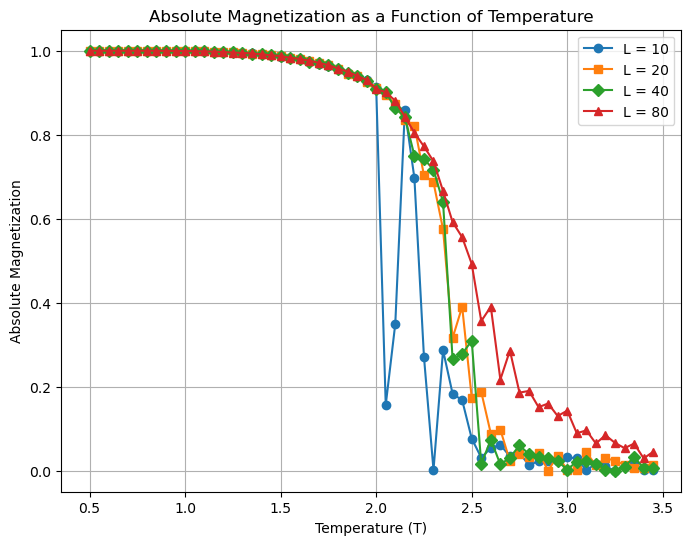

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L, probability_of_spin_up):
    lattice = np.random.choice([-1, 1], size=(L, L), p=[1 - probability_of_spin_up, probability_of_spin_up])
    return lattice

def update(lattice, temperature):
    L = lattice.shape[0]
    i = np.random.randint(L)
    j = np.random.randint(L)
    spin = lattice[i, j]
    neighbors = lattice[(i+1)%L, j] + lattice[i-1, j] + lattice[i, (j+1)%L] + lattice[i, j-1]
    energy_diff = 2 * spin * neighbors
    if (energy_diff <= 0) or (temperature > 0 and np.random.uniform() < np.exp(-energy_diff / temperature)):
        lattice[i, j] = -spin

# Parameters
lattice_sizes = [10, 20, 40, 80]  # Lattice sizes

probability_of_spin_up = 1  # Probability of spin up - everyone is up

temperatures = np.arange(0.5, 3.5, 0.05)  # Temperature range
thermalization_steps = 7000  # Thermalization steps
steps_MCS = 100
steps_L = 10*10*64
n_steps = steps_MCS*steps_L  # Total number of steps per trajectory

# Initialize arrays to store magnetization values for each temperature and lattice size
magnetizations = np.zeros((len(lattice_sizes), len(temperatures)))

# Simulate
for i, L in enumerate(lattice_sizes):
    for j, temperature in enumerate(temperatures):
        lattice = initialize_lattice(L, probability_of_spin_up)

        # Thermalization steps
        for k in range(thermalization_steps):
            update(lattice, temperature)

        # Magnetization measurement steps
        magnetization_sum = 0
        for k in range(n_steps):
            update(lattice, temperature)
            magnetization = np.sum(lattice) / (L * L)
            magnetization_sum += magnetization

        magnetizations[i, j] = magnetization_sum / n_steps
        
# Save magnetization data to file
np.savetxt('magnetization_data.txt', magnetizations)

# Plot figure
markers = ['o', 's', 'D', '^']  # Marker symbols for different lattice sizes

plt.figure(figsize=(8, 6))
for i, L in enumerate(lattice_sizes):
    plt.plot(temperatures, np.abs(magnetizations[i]), marker=markers[i], label=f'L = {L}')

plt.xlabel('Temperature (T)')
plt.ylabel('Absolute Magnetization')
plt.title('Absolute Magnetization as a Function of Temperature')
plt.legend()
plt.grid(True)
plt.show()